<a href="https://colab.research.google.com/github/hongsamhc2/devhiiostudy/blob/main/colab/ML_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Download dataset MNIST

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)

In [55]:
# check dataset keys()

mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [56]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [57]:
y.shape

(70000,)

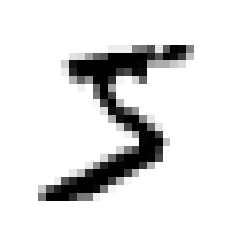

In [58]:
# Check image Use matplotlib imshow() method

import matplotlib
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [59]:
y[0]

'5'

In [60]:
# transform datatype 'y' uint8
import numpy as np

y = y.astype(np.uint8)

In [61]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [62]:
# binary classifier
# 5-detector

y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [63]:
# Use SGDClassifier - Stochastic Gradient Descent : 
# The SGDClassifier has a advantage of processing large datasets.
# This mpdel handles training samples independently, one at a time
# So SGDClassifier fits well with online learning.
# In some case , Shuffling Dataset sampling is not good
# example Sequantial Dataset like Stock, wheather

In [64]:
# Use SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
sgd_pred = sgd_clf.predict([some_digit])

In [66]:
sgd_pred

array([ True])

In [67]:
# performance measurement
# Evaluating the Classifier is more difficult than the regression model
# Use StratifiedKFold
# record

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train,y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [69]:
# Create def Never 5 Classifier Use BaseEstimator

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self,X,y=None):
    return self
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

In [70]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [71]:
# more better processing is to use confusion matrix
# Create predict value Use cross_val_predict

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [73]:
# precision_score / recall_score

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [74]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [75]:
# f1 score 

from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [76]:
#tradeoff
#record

y_scores = sgd_clf.decision_function([some_digit])

In [77]:
y_scores

array([2164.22030239])

In [78]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)

In [79]:
y_some_digit_pred

array([ True])

In [80]:
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [81]:
# return decision_function 

y_scores = cross_val_predict(sgd_clf,X_train, y_train_5, cv =3,
                             method = 'decision_function')

In [82]:
# Use precosopm_recall_curve because of check about all threshold

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [83]:
#create visualize function -
def plot_precision_recall_vs_threshold(precisions , recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],'b--',label ='precisions')
  plt.plot(thresholds,recalls[:-1],'g--',label='recalls')
  plt.grid()
  plt.legend()

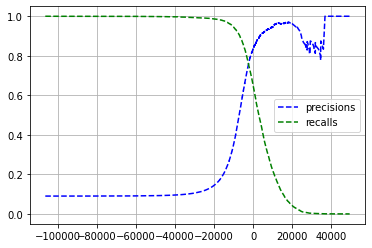

In [84]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [85]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

In [86]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [87]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [88]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [89]:
# roc_curve 
# record

from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [90]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.grid()
  plt.legend()

No handles with labels found to put in legend.


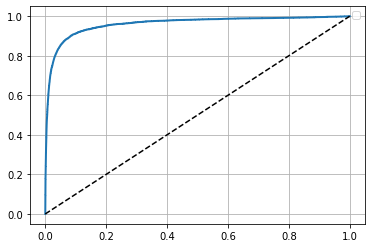

In [91]:
plot_roc_curve(fpr,tpr)

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [93]:
# compare randomforestclassifier and sgdclassofier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                   method='predict_proba')

In [94]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

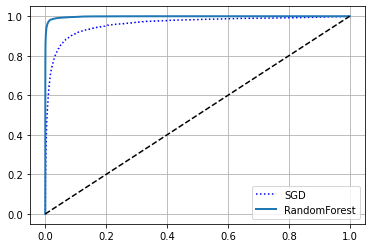

In [95]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'RandomForest')
plt.legend(loc='lower right')
plt.show()

In [96]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [97]:
# multiclass classifier

# OvR / OvA / OvO

from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [98]:
some_digit_score = svm_clf.decision_function([some_digit])
some_digit_score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [99]:
np.argmax(some_digit_score
          )

5

In [100]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [101]:
svm_clf.classes_[5]

5

In [102]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [1]:
# analysis error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)

NameError: ignored

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [ ]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
cl_a,cl_b =3,5

X_aa =X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab =X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba =X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb =X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(x_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25],images_per_row=5)
plt.show()

In [ ]:
# multi label classifier

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_tain_odd = (y_train%2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv =3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')

In [ ]:
# add noise 
noise = np.random.randint(0,100,(len(X_train),784)))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test+noise
y_train_mode = X_train
y_test_mode = y_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mode)
clean_git = knn_clf.predict([X_test_mod[some_index]])

In [ ]:
plot_digit(clean_git)